## 1. Introduction to Tensors ##

In [210]:
import torch
torch.__version__

'2.2.1'

A first example of a tensor is a picture represented as [colour_channels, height, width] with shape [3, 224, 224]. This is a three dimensional tensor.#

In [14]:
# Creating a one-dimensional tensor (vector)
vector = torch.tensor([7, 7, 7])

# Checking dimensions of a tensor
vector.ndim

# Checking the shape of a tensor
vector.shape

torch.Size([3])

In [7]:
# Creating a zero-dimensional tensor (scalar)
scalar = torch.tensor(7)

# Checking dimensions of a tensor
scalar.ndim

# Extract the number of a one-element tensor
scalar.item()

7

In [20]:
# Creating a two-dimensional tensor (matrix)
matrix = torch.tensor([[7, 8], 
                       [9, 10]])

# Checking dimensions of a tensor
matrix.ndim

# Checking the shape of a tensor
matrix.shape

torch.Size([2, 2])

In [46]:
# Creating a three-dimensional tensor 
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])

# Creating a three-dimensional tensor with 16-bit precision
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]], dtype=torch.float16)

# Checking dimensions of a tensor
TENSOR.ndim

# Checking the shape of a tensor. The shape goes from outer to inner. 
# Here it means we have 1 dimension of 3x3 matrix.
TENSOR.shape

torch.Size([1, 3, 3])

We can image the dimensionality with the brackets in the tensor:

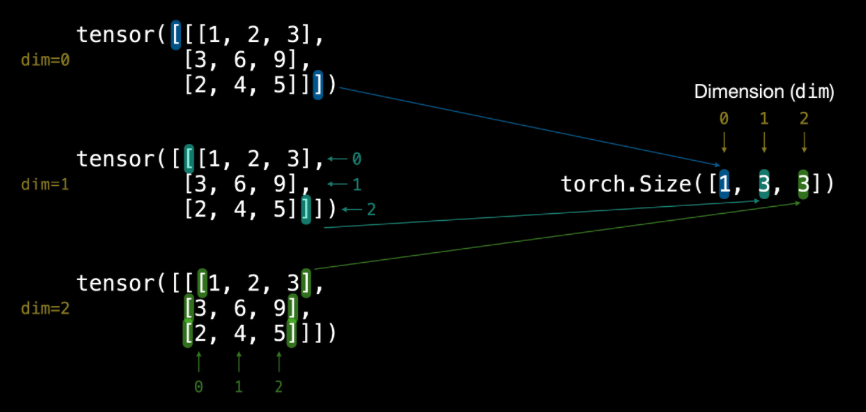

In [165]:
# Create a tensor
some_tensor = torch.rand(3, 4, 3)

# Find out details about it
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

Shape of tensor: torch.Size([3, 4, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [166]:
# Indexing Tensors from outer dimensions to inner dimensions
print(f"First square bracket:\n{some_tensor[0]}") 
print(f"Second square bracket: {some_tensor[0][0]}") 
print(f"Third square bracket: {some_tensor[0][0][0]}")

First square bracket:
tensor([[0.3504, 0.1374, 0.4511],
        [0.7081, 0.9118, 0.7232],
        [0.8855, 0.2169, 0.9513],
        [0.7280, 0.0047, 0.9657]])
Second square bracket: tensor([0.3504, 0.1374, 0.4511])
Third square bracket: 0.35040974617004395


In [172]:
# To get all values in a specific dimension, use : symbol
print(some_tensor[:, :, 0], "\n")
print(some_tensor[:, 0], "\n")
print(some_tensor[0, :, 0], "\n")

tensor([[0.3504, 0.7081, 0.8855, 0.7280],
        [0.6368, 0.7002, 0.7566, 0.7681],
        [0.4778, 0.0404, 0.8297, 0.2988]]) 

tensor([[0.3504, 0.1374, 0.4511],
        [0.6368, 0.6858, 0.5785],
        [0.4778, 0.8067, 0.0492]]) 

tensor([0.3504, 0.7081, 0.8855, 0.7280]) 



## 2. Creating Random, Zero and Ones Tensors ##
Random tensors are important as in machine learning we usually start with random numbers, look at data and update the numbers according to the data. 

In [44]:
# Create a random tensor of size (3,4)
random_3_4_tensor = torch.rand(size=(3,2,4))

In [43]:
# Creating a tensor full of zeros
zeros = torch.zeros(size=(2, 3))

# Creating a tensor full of zeros with shape of input tensor
zeros_like_input = torch.zeros_like(random_3_4_tensor)

# Creating a tensor full of ones
ones = torch.ones(size=(2,3))

# Creating a tensor full of zeros with shape of input tensor
ones_like_input = torch.ones_like(random_3_4_tensor)

In [45]:
# Creating a tensor with a range of numbers
zero_to_ten_tensor = torch.arange(start=0, end=10, step=2)

## 3. Basic operations on Tensors ##

In [74]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Adding a scalar (broadcasting!!)
tensor + 10      # Alternative: torch.add(tensor, 10)

# Multiplying with a scalar (broadcasting!!)
tensor * 10      # Alternative: torch.multiply(tensor, 10)

# Multiplying two tensors with * will be done element wise
print("Element-wise multiplication: ") 
print(tensor * tensor, "\n")


# Dot product of two tensors corresponds to normal matrix multiplication
print("Standard Matrix Multiplication")
print(torch.matmul(tensor, tensor))      # Alternative: tensor @ tensor or torch.mm(tensor, tensor)

Element-wise multiplication: 
tensor([[ 1,  4,  9],
        [16, 25, 36],
        [49, 64, 81]]) 

Standard Matrix Multiplication
tensor([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])


In [78]:
# ATTENTION: Watch out for the dimensions when doing matrix multiplication!!
# Transpose a tensor with shape (3, 4, 5) to (5, 4, 3)
tensor2 = torch.rand(size=(3,4,5))
tensor2_transposed = torch.transpose(tensor2, 0, 2)
tensor2.shape, tensor2_transposed.shape

# Use tensor2.T only for 2 dimensional tensors (=matrices)

(torch.Size([3, 4, 5]), torch.Size([5, 4, 3]))

In [113]:
# Change data type of a tensor
test_tensor = torch.randint(0, 10, (10,))
print(test_tensor.dtype)

test_tensor = test_tensor.type(torch.float32)
print(test_tensor.dtype)

torch.int64
torch.float32


## 4. Finding the min, max, mean, sum, etc. ##

In [116]:
# Create a random tensor consisting of integers from 0 to 9
tensor = torch.randint(0, 10, (10,))
tensor

tensor([1, 1, 8, 8, 3, 2, 9, 5, 5, 4])

In [117]:
# Get the minimum of the tensor
tensor.min()         # Alternative: torch.max(tensor)

# Get the maximum of the tensor
tensor.max()         # Alternative: torch.max(tensor)

# Get the mean of the tensor. Changing the data type beforehand is necessary
tensor.type(torch.float32).mean()         # Alternative: torch.mean(tensor.type(torch.float32))

# Get the sum of the tensor
tensor.sum()         # Alternative: torch.max(tensor)

tensor(46)

In [118]:
# Get the index of a min/max element
tensor.argmin()       # Alternative: torch.argmin(tensor)
tensor.argmax()       # Alternative: torch.argmax(tensor)

tensor(6)

## 5. Rashaping, Stacking, Squeezing ##
To change the shape of the tensors without affecting the "content", we use the following operations.

In [123]:
tensor = torch.randint(0, 10, (3,4))
print(tensor)

tensor([[0, 0, 4, 6],
        [6, 8, 7, 1],
        [0, 3, 3, 6]])


In [144]:
# Reshaping a tensor to a vector
tensor_reshaped = tensor.reshape(12)
print("Vector: ", tensor_reshaped, "\n")

# Reshaping a tensor to a matrix
tensor_reshaped2 = tensor.reshape(6,2)
print("Matrix: ", tensor_reshaped2, "\n")

# Reshaping a matrix into a three-dimensional tensor
tensor_reshaped3 = tensor.reshape(3, 1, 4)
print("Tensor: ", tensor_reshaped3, "\n")

Vector:  tensor([0, 0, 4, 6, 6, 8, 7, 1, 0, 3, 3, 6]) 

Matrix:  tensor([[0, 0],
        [4, 6],
        [6, 8],
        [7, 1],
        [0, 3],
        [3, 6]]) 

Tensor:  tensor([[[0, 0, 4, 6]],

        [[6, 8, 7, 1]],

        [[0, 3, 3, 6]]]) 



In [150]:
# Stacking a row vector to get two row vectors above each other
row_vector_stacked = torch.stack([tensor_reshaped, tensor_reshaped], dim=0)
print(row_vector_stacked, "\n")

# Stacking two row vector as column vectors side by side 
column_vector_stacked = torch.stack([tensor_reshaped, tensor_reshaped], dim=1)
print(column_vector_stacked)

tensor([[0, 0, 4, 6, 6, 8, 7, 1, 0, 3, 3, 6],
        [0, 0, 4, 6, 6, 8, 7, 1, 0, 3, 3, 6]]) 

tensor([[0, 0],
        [0, 0],
        [4, 4],
        [6, 6],
        [6, 6],
        [8, 8],
        [7, 7],
        [1, 1],
        [0, 0],
        [3, 3],
        [3, 3],
        [6, 6]])


In [163]:
tensor = torch.rand(size=(100, 200, 50))

# Rearrange the axis (=Permute the original tensor)
tensor_permuted = tensor.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {tensor.shape}")
print(f"New shape: {tensor_permuted.shape}")

Previous shape: torch.Size([100, 200, 50])
New shape: torch.Size([50, 100, 200])


## 6. Numpy to Pytorch ##
Converting numpy arrays to PyTorch tensors and vice versa

In [180]:
import numpy as np
array = np.arange(0., 10.)          # default 64 bit float
tensor = torch.arange(0., 10.)

# Create a NumPy array from a PyTorch tensor
# Will be default at 32 bit float
array_from_pytorch = tensor.numpy()         # Alternative: torch.Tensor.numpy(tensor)

# Create a PyTorch tensor from a NumPy array
# Conversion helps to avoid any problems aferwards with the data type
tensor_from_array = torch.from_numpy(array).type(torch.float32)

## 7. Reproducibility ##
Often it is necessary to have a "controlled" randomness for reproducibility of test cases. Therefore we want to have a specific test set reproduced very similarly.

To have a "specific randomness", we set a seed number and then generate the random tensor based on this seed number. Using the same seed number will always lead to the same "random" tensor!

To use this for numpy 

In [191]:
torch.manual_seed(10)
random_tensor = torch.rand(2,3)

# Same seed number as above, hence same tensor
torch.random.manual_seed(10)
random_tensor2 = torch.rand(2,3)

# Different seed number leads to different tensor
torch.random.manual_seed(5)
random_tensor3 = torch.rand(2,3)

random_tensor, random_tensor2, random_tensor3

(tensor([[0.4581, 0.4829, 0.3125],
         [0.6150, 0.2139, 0.4118]]),
 tensor([[0.4581, 0.4829, 0.3125],
         [0.6150, 0.2139, 0.4118]]),
 tensor([[0.8303, 0.1261, 0.9075],
         [0.8199, 0.9201, 0.1166]]))

## 8. Programming on GPU on Mac M1 ##
On Mac OS M1, use the device "mps", on a Nvidia GPU use "cuda". Letting huge tensor operations run on GPU is much faster than on the CPU. To get the number of accessable GPU's on a Nvidia GPU, use *torch.cude.device_count()*.

**Important:** Numpy is not supported on the GPU

In [205]:
import time
# Check if a GPU is available and use it if available. If not, use the standard CPU.
# Use this device agnostic code whereever possible
mps_device = "mps" if torch.backends.mps.is_available() else "cpu"
torch.random.manual_seed(42)
tensor_GPU1 = torch.rand(size=(500,500,500), device=mps_device)
torch.random.manual_seed(42)
tensor_GPU2 = torch.rand(size=(500,500,500), device=mps_device)

# Use CPU to get a comparison
# Take the same seed as above for comparison
torch.random.manual_seed(42)
tensor_CPU1 = torch.rand(size=(500,500,500))
torch.random.manual_seed(42)
tensor_CPU2 = torch.rand(size=(500,500,500))

start_time = time.time()
y = tensor_GPU1 * tensor_GPU2
print("Running time on GPU: ", time.time() - start_time, " seconds")

start_time = time.time()
y = tensor_CPU1 * tensor_CPU2
print("Running time on CPU: ", time.time() - start_time, " seconds")

Running time on GPU:  0.020342111587524414  seconds
Running time on CPU:  0.08690404891967773  seconds


In [209]:
# Put a tensor on a device (GPU is available, otherwise CPU)
device = "mps" if torch.backends.mps.is_available() else "cpu"
tensor = torch.rand(size=(3,4))
tensor = tensor.to(device)
tensor

tensor([[0.5643, 0.1667, 0.4598, 0.7379],
        [0.5202, 0.2338, 0.6750, 0.9982],
        [0.8625, 0.2300, 0.2243, 0.2788]], device='mps:0')

In [212]:
# Putting a tensor back on CPU (e.g. to use it in NumPy)
tensor_cpu = tensor.cpu()
tensor_cpu

tensor([[0.5643, 0.1667, 0.4598, 0.7379],
        [0.5202, 0.2338, 0.6750, 0.9982],
        [0.8625, 0.2300, 0.2243, 0.2788]])